Notebook with SQL queries from covid data exploration project, with added visualizations, using sql magic, pandas, seaborn and matloplib

In [1]:
%load_ext sql

In [4]:
%sql ibm_db_sa://mks67860:ddolLaLqQcCbKxuA@h764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB?security=SSL

In [7]:
#sql select TABSCHEMA, TABNAME, CREATE_TIME from SYSCAT.TABLES where TABSCHEMA='MKS67860'

In [8]:
import pandas as pd

Total cases vs total deaths in a specific country.

In [9]:
total_cases_vs_deaths = %sql Select Location, date, total_cases, total_deaths, (total_deaths * 1.0 / total_cases * 1.0)*100 as DeathPercentage From COVIDDEATHS where location like 'Albania' order by 1,2

df = total_cases_vs_deaths.DataFrame()

df.head()

 * ibm_db_sa://mks67860:***@h764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


,location,DATE,total_cases,total_deaths,deathpercentage
0,Albania,2020-02-25,NaN,NaN,None
1,Albania,2020-02-26,NaN,NaN,None
2,Albania,2020-02-27,NaN,NaN,None
3,Albania,2020-02-28,NaN,NaN,None
4,Albania,2020-02-29,NaN,NaN,None


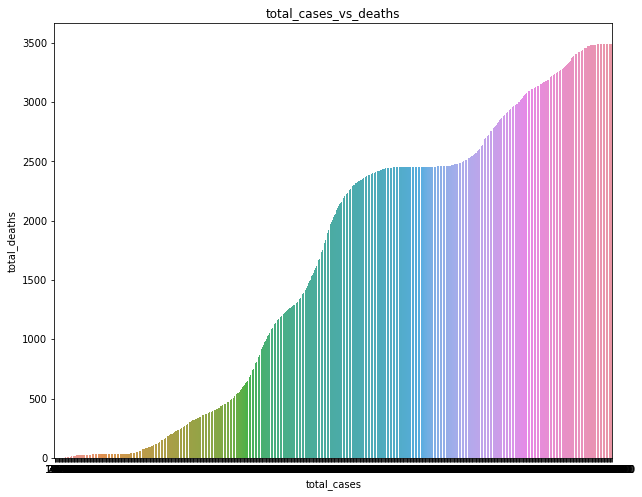

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
plot_2 = sns.barplot(x="total_cases",y="total_deaths", data=df).set(title = 'total_cases_vs_deaths')
plt.show()

Total cases vs population in a specific country

In [11]:
total_cases_vs_population = %sql Select Location, date, total_cases, population, (total_cases * 1.0 /population * 1.0) * 100 as InfectedPercentage From COVIDDEATHS where location like 'Albania'order by 1,2

total_cases_vs_population = total_cases_vs_population.DataFrame()

total_cases_vs_population.head()

 * ibm_db_sa://mks67860:***@h764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


,location,DATE,total_cases,population,infectedpercentage
0,Albania,2020-02-25,NaN,2872934,None
1,Albania,2020-02-26,NaN,2872934,None
2,Albania,2020-02-27,NaN,2872934,None
3,Albania,2020-02-28,NaN,2872934,None
4,Albania,2020-02-29,NaN,2872934,None


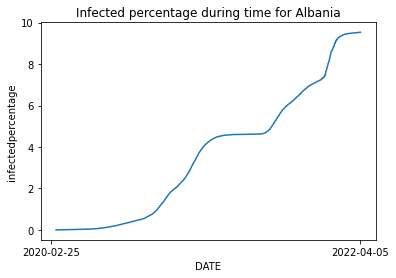

In [12]:
plot = sns.lineplot(x="DATE",y="infectedpercentage", data=total_cases_vs_population)

my_xticks = ['2020-02-25', '2022-04-05']
plt.xticks([my_xticks[-1], my_xticks[0]], visible=True, rotation="horizontal")
plot.invert_yaxis()
plot.set(title='Infected percentage during time for Albania')
#sns.set(rc={'figure.figsize':(5.7,5.27)})
plt.show()

Countries with highest infections rates

In [13]:
highest_infections = %sql Select Location, MAX(total_cases) as HighestInfectCount, population, MAX((total_cases * 1.0 /population * 1.0) * 100) as InfectedPercentage From COVIDDEATHS Group by Location, population order by InfectedPercentage desc;

highest_infections = highest_infections.DataFrame()

top_ten = (highest_infections.query('infectedpercentage > 0')
          .head(10))
top_ten

 * ibm_db_sa://mks67860:***@h764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


,location,highestinfectcount,population,infectedpercentage
15,Faeroe Islands,34658.0,49053.0,70.65419036552300572000
16,Denmark,3072334.0,5813302.0,52.85006696710406581000
17,Andorra,40024.0,77354.0,51.74134498539183494000
18,Gibraltar,17120.0,33691.0,50.81475765041108901000
19,Cyprus,447161.0,896005.0,49.90608311337548339000
20,Iceland,182633.0,368792.0,49.52195275385583201000
21,Slovenia,978134.0,2078723.0,47.05456186322083317000
22,Netherlands,8029012.0,17173094.0,46.75343883868567888000
23,Slovakia,2468812.0,5449270.0,45.30537117815780829000
24,San Marino,15345.0,34010.0,45.11908262275801234000


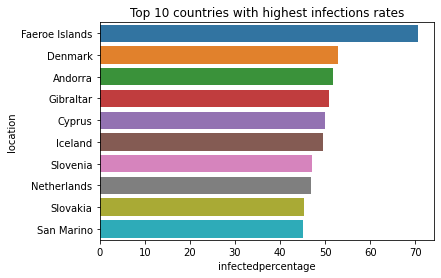

In [14]:
plot = sns.barplot(x='infectedpercentage',y='location',orient='h',data=top_ten)
plot.set(title='Top 10 countries with highest infections rates');

Countries with highes death count

In [21]:
highest_death_count = %sql Select Location, MAX(total_deaths) as TotalDeaths From COVIDDEATHS where continent is not null and total_cases is not null Group by Location order by TotalDeaths desc;

highest_death_count = highest_death_count.DataFrame()

top_ten_deaths = highest_death_count = highest_death_count.query('totaldeaths > 0').head(10)

top_ten_deaths

 * ibm_db_sa://mks67860:***@h764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


,location,totaldeaths
7,United States,982576.0
8,Brazil,660786.0
9,India,521487.0
10,Russia,362890.0
11,Mexico,323318.0
12,Peru,212372.0
13,United Kingdom,166304.0
14,Italy,160103.0
15,Indonesia,155421.0
16,France,142864.0


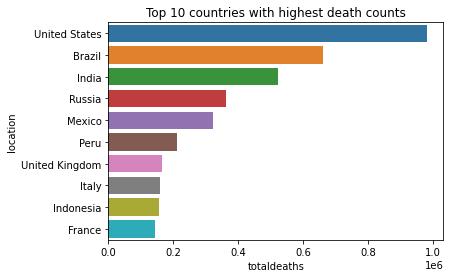

In [26]:
plot = sns.barplot(x='totaldeaths',y='location',orient='h',data=top_ten_deaths)
plot.set(title='Top 10 countries with highest death counts');

Total deaths by continent

In [37]:
by_continent = %sql Select continent, MAX(total_deaths) as TotalDeaths From COVIDDEATHS where continent is not null Group by continent order by TotalDeaths desc;
by_continent = by_continent.DataFrame()
by_continent

 * ibm_db_sa://mks67860:***@h764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


,continent,totaldeaths
0,North America,982576
1,South America,660786
2,Asia,521487
3,Europe,362890
4,Africa,100067
5,Oceania,6462


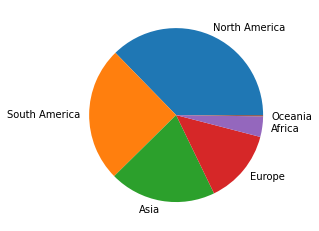

In [45]:
labels = by_continent['continent'].tolist()
data = by_continent['totaldeaths'].tolist()
plt.pie(data, labels = labels)
plt.show()

Global numbers for each date

In [48]:
global_by_date = %sql Select date, SUM(new_cases) as total_cases, SUM(cast(new_deaths as int)) as total_deaths, SUM(new_deaths * 1.0)/SUM(new_cases * 1.0)*100 as DeathPercentage From COVIDDEATHS where continent is not null Group By date order by 1,2;

global_by_date = global_by_date.DataFrame()
global_by_date = global_by_date.query('total_cases > 0')
global_by_date.head()

 * ibm_db_sa://mks67860:***@h764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


,DATE,total_cases,total_deaths,deathpercentage
22,2020-01-23,100.0,1.0,1.000000
23,2020-01-24,287.0,8.0,2.787400
24,2020-01-25,493.0,16.0,3.245400
25,2020-01-26,683.0,14.0,2.049700
26,2020-01-27,809.0,26.0,3.213800


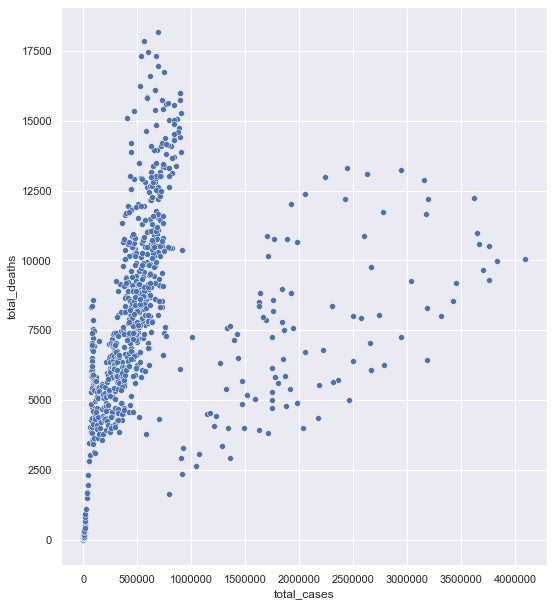

In [70]:
plt.ticklabel_format(style='plain')
sns.scatterplot(data=global_by_date, x="total_cases", y="total_deaths")
sns.set(rc={'figure.figsize':(8.7,11.27)});